In [1]:
#load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

[ Info: Precompiling Nevanlinna [0b21cfa8-e591-48a4-a07b-a9d20be7c264]


In [2]:
# Set work data Type
T = BigFloat
setprecision(128)
;

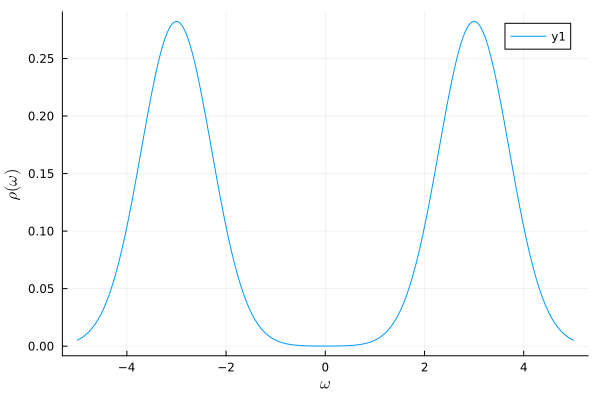

In [3]:
#define spectral function
gaussian(x, mu, sigma) = exp(-((x-mu)/sigma)^2)/(sqrt(π)*sigma)
rho(omega) = 0.5*gaussian(omega, -3.0, 1.0) + 0.5*gaussian(omega, 3.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#construct solver struct
@time sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true)
;

N_imag is setted as 31
H=38
Iter     Function value   Gradient norm 
     0     5.795823e+02     6.636642e+02
 * time: 0.02615189552307129
     1     1.972720e+02     1.795310e+02
 * time: 10.970649003982544
     2     7.556568e+01     1.001426e+02
 * time: 19.941476821899414
     3     3.799843e+01     5.746211e+01
 * time: 25.180583953857422
     4     2.866795e+01     4.445807e+01
 * time: 31.013569831848145
     5     2.059895e+01     3.541189e+01
 * time: 34.13416004180908
     6     1.747622e+01     3.194234e+01
 * time: 36.53140187263489
     7     1.459618e+01     2.768783e+01
 * time: 40.28061389923096
     8     1.427171e+01     2.677358e+01
 * time: 42.433297872543335
     9     9.556122e+00     1.752469e+01
 * time: 44.68327784538269
    10     6.882260e+00     1.348843e+01
 * time: 48.33630990982056
    11     5.974817e+00     1.275514e+01
 * time: 52.0879168510437
    12     5.082726e+00     1.071724e+01
 * time: 53.51679491996765
    13     4.909711e+00     1.052070e+01


   119     3.773058e-04     5.290143e-03
 * time: 217.38828086853027
   120     3.736427e-04     3.017897e-03
 * time: 218.93298196792603
   121     3.700751e-04     4.265292e-03
 * time: 220.12807393074036
   122     3.671467e-04     2.461415e-03
 * time: 221.14453887939453
   123     3.641683e-04     3.715474e-03
 * time: 222.12970399856567
   124     3.616239e-04     2.428769e-03
 * time: 223.47324585914612
   125     3.588378e-04     3.272499e-03
 * time: 224.63644695281982
   126     3.563255e-04     2.468417e-03
 * time: 225.81947803497314
   127     3.534446e-04     2.962373e-03
 * time: 226.89327597618103
   128     3.507631e-04     2.241943e-03
 * time: 227.8406000137329
   129     3.476830e-04     2.925808e-03
 * time: 228.78822994232178
   130     3.447513e-04     2.143093e-03
 * time: 229.8704869747162
   131     3.414291e-04     2.990914e-03
 * time: 230.85263180732727
   132     3.382216e-04     2.189337e-03
 * time: 232.07512092590332
   133     3.347170e-04     3.239931

   239     1.532693e-04     8.035225e-04
 * time: 351.5947070121765
   240     1.529432e-04     7.449619e-04
 * time: 352.8804919719696
   241     1.526180e-04     7.621606e-04
 * time: 354.05897998809814
   242     1.522922e-04     8.047004e-04
 * time: 355.2921938896179
   243     1.519691e-04     8.324532e-04
 * time: 356.44301986694336
   244     1.516434e-04     8.310589e-04
 * time: 357.5619549751282
   245     1.513234e-04     8.728271e-04
 * time: 358.89554595947266
   246     1.510023e-04     8.115805e-04
 * time: 360.120484828949
   247     1.506906e-04     8.411121e-04
 * time: 361.0732350349426
   248     1.503820e-04     7.495404e-04
 * time: 362.0441930294037
   249     1.500866e-04     8.084242e-04
 * time: 362.99800992012024
   250     1.497995e-04     7.037080e-04
 * time: 363.9432849884033
   251     1.495285e-04     7.756419e-04
 * time: 365.4367618560791
   252     1.492689e-04     6.824243e-04
 * time: 366.46395683288574
   253     1.490265e-04     8.264877e-04
 * 

   359     1.377581e-04     2.481037e-04
 * time: 492.52630496025085
   360     1.376782e-04     3.828375e-04
 * time: 494.15196204185486
   361     1.376326e-04     3.167794e-04
 * time: 495.91962003707886
   362     1.375650e-04     3.245227e-04
 * time: 497.7601490020752
   363     1.375233e-04     3.216826e-04
 * time: 498.83850598335266
   364     1.374569e-04     3.253826e-04
 * time: 500.2609238624573
   365     1.374160e-04     3.237142e-04
 * time: 501.4317648410797
   366     1.373440e-04     2.993688e-04
 * time: 503.0813899040222
   367     1.372952e-04     2.817534e-04
 * time: 504.2582199573517
   368     1.371969e-04     3.693237e-04
 * time: 506.02084493637085
   369     1.371347e-04     3.638093e-04
 * time: 507.10574889183044
   370     1.370251e-04     3.168132e-04
 * time: 509.3760929107666
   371     1.369606e-04     2.219277e-04
 * time: 510.64350986480713
   372     1.368351e-04     5.832194e-04
 * time: 512.4644029140472
   373     1.367726e-04     5.631291e-04


   480     1.270707e-04     3.436587e-04
 * time: 664.1352498531342
   481     1.269935e-04     2.658133e-04
 * time: 665.2160868644714
   482     1.269028e-04     2.626490e-04
 * time: 666.7554750442505
   483     1.268376e-04     1.797360e-04
 * time: 667.8556599617004
   484     1.267632e-04     2.192912e-04
 * time: 669.3392019271851
   485     1.267085e-04     1.875228e-04
 * time: 670.2623879909515
   486     1.266370e-04     2.325401e-04
 * time: 671.601616859436
   487     1.265837e-04     2.087252e-04
 * time: 672.5350148677826
   488     1.265149e-04     2.690823e-04
 * time: 674.0969839096069
   489     1.264643e-04     2.334828e-04
 * time: 675.5576930046082
   490     1.263921e-04     2.875842e-04
 * time: 677.3359699249268
   491     1.263407e-04     2.658103e-04
 * time: 678.9274399280548
   492     1.262643e-04     2.469647e-04
 * time: 680.4677278995514
   493     1.262130e-04     2.580006e-04
 * time: 681.3690569400787
   494     1.261285e-04     1.720775e-04
 * time:

   601     1.174322e-04     3.059135e-04
 * time: 794.6897430419922
   602     1.173645e-04     2.660274e-04
 * time: 795.6062109470367
   603     1.172960e-04     2.957074e-04
 * time: 796.5449600219727
   604     1.172290e-04     2.548786e-04
 * time: 797.5074729919434
   605     1.171612e-04     2.868857e-04
 * time: 798.4341199398041
   606     1.170950e-04     2.448423e-04
 * time: 799.3093810081482
   607     1.170279e-04     2.887999e-04
 * time: 800.2101759910583
   608     1.169623e-04     2.362545e-04
 * time: 801.10493683815
   609     1.168957e-04     2.987814e-04
 * time: 802.0377008914948
   610     1.168304e-04     2.290787e-04
 * time: 802.9653339385986
   611     1.167641e-04     3.099650e-04
 * time: 803.8973429203033
   612     1.166988e-04     2.237461e-04
 * time: 804.7770888805389
   613     1.166323e-04     3.211975e-04
 * time: 805.7034068107605
   614     1.165668e-04     2.254886e-04
 * time: 806.6275329589844
   615     1.164998e-04     3.314180e-04
 * time: 

   722     1.093796e-04     3.330301e-04
 * time: 907.6716368198395
   723     1.093262e-04     2.921297e-04
 * time: 908.6032269001007
   724     1.092735e-04     3.286329e-04
 * time: 909.5035028457642
   725     1.092202e-04     2.878084e-04
 * time: 910.4002819061279
   726     1.091676e-04     3.234013e-04
 * time: 911.424724817276
   727     1.091143e-04     2.858408e-04
 * time: 912.3402738571167
   728     1.090618e-04     3.174803e-04
 * time: 913.2558560371399
   729     1.090086e-04     2.863317e-04
 * time: 914.1496169567108
   730     1.089563e-04     3.110261e-04
 * time: 915.0555260181427
   731     1.089031e-04     2.868011e-04
 * time: 916.1124179363251
   732     1.088510e-04     3.041941e-04
 * time: 917.0834968090057
   733     1.087977e-04     2.894059e-04
 * time: 918.0706570148468
   734     1.087457e-04     2.971239e-04
 * time: 919.017345905304
   735     1.086922e-04     2.921939e-04
 * time: 919.9525978565216
   736     1.086402e-04     2.899213e-04
 * time: 

   843     1.008395e-04     3.688015e-04
 * time: 1044.8880219459534
   844     1.007013e-04     3.873911e-04
 * time: 1045.8023920059204
   845     1.005381e-04     3.406053e-04
 * time: 1047.1287269592285
   846     1.004110e-04     3.871360e-04
 * time: 1048.0591559410095
   847     1.002671e-04     3.368788e-04
 * time: 1049.4918639659882
   848     1.001598e-04     3.928377e-04
 * time: 1050.360095024109
   849     1.000305e-04     2.509991e-04
 * time: 1051.749408006668
   850     9.993707e-05     3.003239e-04
 * time: 1052.650682926178
   851     9.981429e-05     2.539702e-04
 * time: 1053.9930429458618
   852     9.972940e-05     2.676166e-04
 * time: 1054.9078249931335
   853     9.961912e-05     2.317590e-04
 * time: 1056.2583730220795
   854     9.955987e-05     2.265228e-04
 * time: 1057.1852729320526
   855     9.945944e-05     2.474831e-04
 * time: 1058.5509059429169
   856     9.942419e-05     2.623687e-04
 * time: 1059.5123889446259
   857     9.933612e-05     2.390725e

   963     9.416622e-05     2.064343e-04
 * time: 1183.437975883484
   964     9.414251e-05     1.764060e-04
 * time: 1184.4272618293762
   965     9.411323e-05     1.687804e-04
 * time: 1185.7951118946075
   966     9.408972e-05     1.464911e-04
 * time: 1186.757323026657
   967     9.405270e-05     1.655840e-04
 * time: 1188.34175491333
   968     9.402162e-05     1.497688e-04
 * time: 1189.2976109981537
   969     9.397941e-05     1.782338e-04
 * time: 1190.7007060050964
   970     9.394243e-05     1.650262e-04
 * time: 1191.6710419654846
   971     9.388856e-05     1.778861e-04
 * time: 1193.0273950099945
   972     9.384128e-05     1.832907e-04
 * time: 1193.8930208683014
   973     9.377964e-05     1.856201e-04
 * time: 1195.6836009025574
   974     9.373080e-05     1.780507e-04
 * time: 1196.672350883484
   975     9.366503e-05     1.840061e-04
 * time: 1198.0142860412598
   976     9.361635e-05     1.624888e-04
 * time: 1198.9267468452454
   977     9.355311e-05     2.092156e-0

  1083     8.814756e-05     1.331525e-04
 * time: 1316.752168893814
  1084     8.812243e-05     1.306632e-04
 * time: 1317.7463150024414
  1085     8.809377e-05     1.396646e-04
 * time: 1319.0112309455872
  1086     8.806746e-05     1.199246e-04
 * time: 1320.0983049869537
  1087     8.803264e-05     1.509930e-04
 * time: 1321.0180218219757
  1088     8.800146e-05     1.228161e-04
 * time: 1322.076947927475
  1089     8.793538e-05     2.029809e-04
 * time: 1323.0220279693604
  1090     8.788067e-05     1.546165e-04
 * time: 1323.981782913208
  1091     8.783569e-05     2.057736e-04
 * time: 1324.955235004425
  1092     8.779618e-05     1.732330e-04
 * time: 1325.8709468841553
  1093     8.769486e-05     2.343881e-04
 * time: 1327.2402129173279
  1094     8.762398e-05     2.614430e-04
 * time: 1328.2486488819122
  1095     8.761244e-05     2.491951e-04
 * time: 1329.1539208889008
  1096     8.759160e-05     2.487288e-04
 * time: 1330.0938749313354
  1097     8.756781e-05     2.407525e-

  1203     8.408756e-05     1.956169e-04
 * time: 1433.2638158798218
  1204     8.398774e-05     2.086996e-04
 * time: 1435.062110900879
  1205     8.395712e-05     2.185531e-04
 * time: 1436.005134820938
  1206     8.390148e-05     1.873624e-04
 * time: 1437.3817670345306
  1207     8.388010e-05     1.773044e-04
 * time: 1438.2883179187775
  1208     8.384875e-05     1.930150e-04
 * time: 1439.2342720031738
  1209     8.381437e-05     1.610986e-04
 * time: 1440.2004640102386
  1210     8.378490e-05     1.638191e-04
 * time: 1441.1255178451538
  1211     8.375824e-05     1.497508e-04
 * time: 1442.2588839530945
  1212     8.373440e-05     1.471050e-04
 * time: 1443.49538397789
  1213     8.370769e-05     1.355795e-04
 * time: 1444.3871648311615
  1214     8.368014e-05     1.362814e-04
 * time: 1445.3178958892822
  1215     8.364922e-05     1.474397e-04
 * time: 1446.1950960159302
  1216     8.361865e-05     1.063714e-04
 * time: 1447.1367609500885
  1217     8.358704e-05     1.555670e-

  1323     8.144443e-05     1.054561e-04
 * time: 1549.7238368988037
  1324     8.143287e-05     9.617239e-05
 * time: 1550.656742811203
  1325     8.142337e-05     6.642782e-05
 * time: 1551.5642569065094
  1326     8.141279e-05     8.337414e-05
 * time: 1552.495038986206
  1327     8.140371e-05     5.738341e-05
 * time: 1553.4484460353851
  1328     8.139333e-05     9.482785e-05
 * time: 1554.379252910614
  1329     8.138425e-05     8.098906e-05
 * time: 1555.3086409568787
  1330     8.137384e-05     1.030170e-04
 * time: 1556.2539899349213
  1331     8.136468e-05     9.361023e-05
 * time: 1557.146978855133
  1332     8.135435e-05     9.219865e-05
 * time: 1558.0860228538513
  1333     8.134534e-05     9.082485e-05
 * time: 1559.034364938736
  1334     8.133525e-05     6.824179e-05
 * time: 1559.9524099826813
  1335     8.132641e-05     8.754225e-05
 * time: 1560.869824886322
  1336     8.131613e-05     6.787707e-05
 * time: 1561.8031709194183
  1337     8.130693e-05     8.867787e-05

  1443     8.024606e-05     6.398381e-05
 * time: 1692.143816947937
  1444     8.023477e-05     9.974271e-05
 * time: 1693.5189428329468
  1445     8.022621e-05     6.260797e-05
 * time: 1694.4432079792023
  1446     8.021708e-05     9.248385e-05
 * time: 1695.9013459682465
  1447     8.020976e-05     6.132810e-05
 * time: 1696.7990698814392
  1448     8.019862e-05     9.500868e-05
 * time: 1698.161691904068
  1449     8.019033e-05     6.702455e-05
 * time: 1699.0889449119568
  1450     8.018155e-05     8.238838e-05
 * time: 1700.4324679374695
  1451     8.017449e-05     6.570879e-05
 * time: 1701.3621098995209
  1452     8.016200e-05     8.455151e-05
 * time: 1702.7453730106354
  1453     8.015358e-05     7.294551e-05
 * time: 1703.6828229427338
  1454     8.014603e-05     8.336513e-05
 * time: 1705.0589048862457
  1455     8.013972e-05     7.797280e-05
 * time: 1705.9834308624268
  1456     8.012703e-05     9.436621e-05
 * time: 1707.348347902298
  1457     8.011848e-05     8.784790e

  1563     7.962587e-05     6.839218e-05
 * time: 1819.2545688152313
  1564     7.962284e-05     7.615683e-05
 * time: 1820.1702468395233
  1565     7.961985e-05     6.857956e-05
 * time: 1821.0839629173279
  1566     7.961690e-05     7.551180e-05
 * time: 1822.0195498466492
  1567     7.961398e-05     6.852733e-05
 * time: 1822.941428899765
  1568     7.961108e-05     7.465486e-05
 * time: 1823.8640649318695
  1569     7.960821e-05     6.817447e-05
 * time: 1824.8154458999634
  1570     7.960536e-05     7.361587e-05
 * time: 1825.7652678489685
  1571     7.960253e-05     6.751515e-05
 * time: 1826.7161149978638
  1572     7.959971e-05     7.241679e-05
 * time: 1827.6542448997498
  1573     7.959691e-05     6.660196e-05
 * time: 1828.5603740215302
  1574     7.959412e-05     7.106881e-05
 * time: 1829.4794719219208
  1575     7.959134e-05     6.553084e-05
 * time: 1830.5080199241638
  1576     7.958856e-05     6.957542e-05
 * time: 1831.4927220344543
  1577     7.958580e-05     6.44144

  1683     7.930314e-05     6.434949e-05
 * time: 1947.3376379013062
  1684     7.930047e-05     6.926100e-05
 * time: 1948.4592299461365
  1685     7.929779e-05     6.480666e-05
 * time: 1949.622773885727
  1686     7.929510e-05     6.991715e-05
 * time: 1951.2592468261719
  1687     7.929239e-05     6.521158e-05
 * time: 1952.4779448509216
  1688     7.928967e-05     7.050796e-05
 * time: 1953.97851395607
  1689     7.928694e-05     6.557083e-05
 * time: 1954.9509918689728
  1690     7.928420e-05     7.103640e-05
 * time: 1955.9186849594116
  1691     7.928146e-05     6.589307e-05
 * time: 1956.9772210121155
  1692     7.927870e-05     7.150750e-05
 * time: 1957.9085500240326
  1693     7.927594e-05     6.618802e-05
 * time: 1958.8306829929352
  1694     7.927317e-05     7.192768e-05
 * time: 1959.7599749565125
  1695     7.927040e-05     6.646567e-05
 * time: 1960.6794970035553
  1696     7.926763e-05     7.230427e-05
 * time: 1961.6150670051575
  1697     7.926486e-05     6.673570e

  1803     7.892726e-05     5.943841e-05
 * time: 2076.466153860092
  1804     7.892376e-05     6.950949e-05
 * time: 2077.355404853821
  1805     7.892024e-05     5.869776e-05
 * time: 2078.306958913803
  1806     7.891671e-05     6.922522e-05
 * time: 2079.2501509189606
  1807     7.891317e-05     5.800658e-05
 * time: 2080.157956838608
  1808     7.890962e-05     6.905428e-05
 * time: 2081.0890939235687
  1809     7.890606e-05     5.737279e-05
 * time: 2081.984489917755
  1810     7.890249e-05     6.900054e-05
 * time: 2082.9481580257416
  1811     7.889890e-05     5.680440e-05
 * time: 2083.8899059295654
  1812     7.889531e-05     6.906554e-05
 * time: 2084.8277809619904
  1813     7.889170e-05     5.630892e-05
 * time: 2085.7393159866333
  1814     7.888808e-05     6.924814e-05
 * time: 2086.745851993561
  1815     7.888444e-05     5.589264e-05
 * time: 2087.685201883316
  1816     7.888080e-05     6.954430e-05
 * time: 2088.6442370414734
  1817     7.887714e-05     5.555995e-05


  1923     7.844891e-05     4.817241e-05
 * time: 2189.062479019165
  1924     7.844516e-05     4.100317e-05
 * time: 2190.0517859458923
  1925     7.844143e-05     4.785729e-05
 * time: 2190.975785970688
  1926     7.843772e-05     4.100301e-05
 * time: 2191.8868658542633
  1927     7.843401e-05     4.751066e-05
 * time: 2192.789151906967
  1928     7.843032e-05     4.114636e-05
 * time: 2193.7144968509674
  1929     7.842665e-05     4.712768e-05
 * time: 2194.6372458934784
  1930     7.842298e-05     4.142506e-05
 * time: 2195.5561389923096
  1931     7.841933e-05     4.670361e-05
 * time: 2196.505532979965
  1932     7.841569e-05     4.182873e-05
 * time: 2197.439792871475
  1933     7.841206e-05     4.623394e-05
 * time: 2198.3559908866882
  1934     7.840844e-05     4.234524e-05
 * time: 2199.2799339294434
  1935     7.840483e-05     4.571455e-05
 * time: 2200.2175278663635
  1936     7.840124e-05     4.296125e-05
 * time: 2201.1371688842773
  1937     7.839765e-05     4.514185e-0

  2043     7.804279e-05     9.413885e-05
 * time: 2301.3631780147552
  2044     7.803864e-05     7.731902e-05
 * time: 2302.2669110298157
  2045     7.803447e-05     9.461901e-05
 * time: 2303.361814022064
  2046     7.803026e-05     7.763105e-05
 * time: 2304.460891008377
  2047     7.802602e-05     9.504964e-05
 * time: 2305.409287929535
  2048     7.802175e-05     7.789454e-05
 * time: 2306.328852891922
  2049     7.801744e-05     9.542967e-05
 * time: 2307.2377729415894
  2050     7.801310e-05     7.810776e-05
 * time: 2308.1673970222473
  2051     7.800873e-05     9.575820e-05
 * time: 2309.2787408828735
  2052     7.800432e-05     7.826939e-05
 * time: 2310.542536020279
  2053     7.799989e-05     9.603458e-05
 * time: 2311.4880928993225
  2054     7.799541e-05     7.837843e-05
 * time: 2312.384971857071
  2055     7.799091e-05     9.625836e-05
 * time: 2313.2787539958954
  2056     7.798637e-05     7.843425e-05
 * time: 2314.203050851822
  2057     7.798179e-05     9.642926e-05


  2163     7.746355e-05     3.265748e-05
 * time: 2420.5889809131622
  2164     7.746059e-05     3.228276e-05
 * time: 2421.7163858413696
  2165     7.745767e-05     3.128772e-05
 * time: 2422.742506980896
  2166     7.745478e-05     3.201590e-05
 * time: 2423.8160858154297
  2167     7.745194e-05     2.998124e-05
 * time: 2424.8539338111877
  2168     7.744913e-05     3.175713e-05
 * time: 2425.8600640296936
  2169     7.744635e-05     2.873796e-05
 * time: 2426.756975889206
  2170     7.744361e-05     3.150035e-05
 * time: 2427.6834449768066
  2171     7.744091e-05     2.824945e-05
 * time: 2428.619663953781
  2172     7.743823e-05     3.123970e-05
 * time: 2429.5339720249176
  2173     7.743559e-05     2.802715e-05
 * time: 2430.493448972702
  2174     7.743297e-05     3.096958e-05
 * time: 2431.4199509620667
  2175     7.743039e-05     2.780304e-05
 * time: 2432.513202905655
  2176     7.742783e-05     3.068486e-05
 * time: 2433.764561891556
  2177     7.742530e-05     2.757368e-05

  2283     7.718280e-05     5.838848e-05
 * time: 2548.5212688446045
  2284     7.718004e-05     5.287888e-05
 * time: 2549.811121940613
  2285     7.717726e-05     5.872978e-05
 * time: 2550.7331268787384
  2286     7.717445e-05     5.305356e-05
 * time: 2551.611189842224
  2287     7.717163e-05     5.904504e-05
 * time: 2553.1267549991608
  2288     7.716879e-05     5.319876e-05
 * time: 2554.759346008301
  2289     7.716593e-05     5.933489e-05
 * time: 2555.9525558948517
  2290     7.716305e-05     5.331516e-05
 * time: 2557.1288878917694
  2291     7.716015e-05     5.960010e-05
 * time: 2558.4360840320587
  2292     7.715722e-05     5.340345e-05
 * time: 2559.3371438980103
  2293     7.715428e-05     5.984158e-05
 * time: 2560.2779908180237
  2294     7.715132e-05     5.346432e-05
 * time: 2561.261904001236
  2295     7.714834e-05     6.006036e-05
 * time: 2562.3522369861603
  2296     7.714534e-05     5.349844e-05
 * time: 2563.314932823181
  2297     7.714232e-05     6.025757e-0

  2403     7.676823e-05     5.183450e-05
 * time: 2672.153872013092
  2404     7.676477e-05     5.063234e-05
 * time: 2673.133628845215
  2405     7.676130e-05     5.166945e-05
 * time: 2674.048382997513
  2406     7.675782e-05     5.144794e-05
 * time: 2675.1622619628906
  2407     7.675435e-05     5.172557e-05
 * time: 2676.2363288402557
  2408     7.675086e-05     5.223295e-05
 * time: 2677.1374218463898
  2409     7.674738e-05     5.177276e-05
 * time: 2678.0535418987274
  2410     7.674389e-05     5.298648e-05
 * time: 2678.9878849983215
  2411     7.674039e-05     5.180985e-05
 * time: 2679.903124809265
  2412     7.673689e-05     5.370759e-05
 * time: 2681.080559015274
  2413     7.673338e-05     5.183565e-05
 * time: 2682.200098991394
  2414     7.672986e-05     5.439536e-05
 * time: 2683.122803926468
  2415     7.672634e-05     5.184905e-05
 * time: 2684.047303915024
  2416     7.672281e-05     5.504885e-05
 * time: 2684.955476999283
  2417     7.671928e-05     5.184896e-05
 *

  2523     7.631251e-05     4.681430e-05
 * time: 2793.326542854309
  2524     7.630911e-05     4.906520e-05
 * time: 2794.2737908363342
  2525     7.630573e-05     4.695975e-05
 * time: 2795.224756002426
  2526     7.630238e-05     4.909397e-05
 * time: 2796.180065870285
  2527     7.629904e-05     4.708912e-05
 * time: 2797.210471868515
  2528     7.629572e-05     4.911485e-05
 * time: 2798.1234159469604
  2529     7.629243e-05     4.720147e-05
 * time: 2799.0421299934387
  2530     7.628915e-05     4.912701e-05
 * time: 2800.0029079914093
  2531     7.628589e-05     4.729585e-05
 * time: 2801.019788980484
  2532     7.628265e-05     4.912949e-05
 * time: 2801.988049030304
  2533     7.627943e-05     4.737122e-05
 * time: 2803.7796578407288
  2534     7.627623e-05     4.912126e-05
 * time: 2805.196557998657
  2535     7.627305e-05     4.742656e-05
 * time: 2806.6304879188538
  2536     7.626988e-05     4.910127e-05
 * time: 2807.8094589710236
  2537     7.626673e-05     4.746080e-05


  2643     7.592639e-05     4.958941e-05
 * time: 2921.2290728092194
  2644     7.592232e-05     5.305106e-05
 * time: 2922.2752709388733
  2645     7.591824e-05     4.977175e-05
 * time: 2923.209061861038
  2646     7.591412e-05     5.404537e-05
 * time: 2924.2255659103394
  2647     7.590999e-05     4.994175e-05
 * time: 2925.1739768981934
  2648     7.590582e-05     5.505029e-05
 * time: 2926.1851558685303
  2649     7.590164e-05     5.010077e-05
 * time: 2927.1114468574524
  2650     7.589743e-05     5.606516e-05
 * time: 2928.09104681015
  2651     7.589320e-05     5.025014e-05
 * time: 2929.330058813095
  2652     7.588894e-05     5.708918e-05
 * time: 2930.322932958603
  2653     7.588467e-05     5.039117e-05
 * time: 2931.2112250328064
  2654     7.588036e-05     5.812135e-05
 * time: 2932.1158108711243
  2655     7.587604e-05     5.052507e-05
 * time: 2933.046159029007
  2656     7.587169e-05     5.916055e-05
 * time: 2933.9518008232117
  2657     7.586732e-05     5.065301e-05

  2763     7.535009e-05     6.035395e-05
 * time: 3038.297240972519
  2764     7.534558e-05     7.543319e-05
 * time: 3039.1941468715668
  2765     7.534109e-05     5.960978e-05
 * time: 3040.1183938980103
  2766     7.533661e-05     7.448218e-05
 * time: 3041.025874853134
  2767     7.533216e-05     5.882878e-05
 * time: 3041.9742138385773
  2768     7.532773e-05     7.349514e-05
 * time: 3042.8848929405212
  2769     7.532332e-05     5.801266e-05
 * time: 3043.8131699562073
  2770     7.531892e-05     7.247410e-05
 * time: 3044.7093188762665
  2771     7.531455e-05     5.716322e-05
 * time: 3045.6104748249054
  2772     7.531020e-05     7.142116e-05
 * time: 3046.598107814789
  2773     7.530587e-05     5.628232e-05
 * time: 3047.5508909225464
  2774     7.530156e-05     7.033848e-05
 * time: 3048.4793219566345
  2775     7.529727e-05     5.537192e-05
 * time: 3049.5355269908905
  2776     7.529300e-05     6.922826e-05
 * time: 3050.646271944046
  2777     7.528875e-05     5.443404e-

  2883     7.492537e-05     3.652275e-05
 * time: 3149.617213010788
  2884     7.492270e-05     3.595134e-05
 * time: 3150.5152699947357
  2885     7.492005e-05     3.679793e-05
 * time: 3151.5978100299835
  2886     7.491741e-05     3.625082e-05
 * time: 3152.6153750419617
  2887     7.491479e-05     3.706258e-05
 * time: 3153.5394279956818
  2888     7.491218e-05     3.654676e-05
 * time: 3154.4388530254364
  2889     7.490958e-05     3.731591e-05
 * time: 3155.575357913971
  2890     7.490700e-05     3.683971e-05
 * time: 3156.4751620292664
  2891     7.490443e-05     3.755722e-05
 * time: 3157.3782229423523
  2892     7.490188e-05     3.713014e-05
 * time: 3158.3126130104065
  2893     7.489934e-05     3.778584e-05
 * time: 3159.2221159934998
  2894     7.489682e-05     3.741848e-05
 * time: 3160.2374579906464
  2895     7.489430e-05     3.800124e-05
 * time: 3161.207471847534
  2896     7.489180e-05     3.770511e-05
 * time: 3162.1170649528503
  2897     7.488932e-05     3.820289e

  3003     7.464897e-05     5.054315e-05
 * time: 3261.74240899086
  3004     7.464666e-05     4.410930e-05
 * time: 3262.6609869003296
  3005     7.464435e-05     5.081672e-05
 * time: 3263.5796349048615
  3006     7.464204e-05     4.444834e-05
 * time: 3264.522826910019
  3007     7.463973e-05     5.106253e-05
 * time: 3265.451201915741
  3008     7.463742e-05     4.476048e-05
 * time: 3266.3602998256683
  3009     7.463512e-05     5.128101e-05
 * time: 3267.240016937256
  3010     7.463282e-05     4.504593e-05
 * time: 3268.1664509773254
  3011     7.463052e-05     5.147265e-05
 * time: 3269.1000978946686
  3012     7.462823e-05     4.530494e-05
 * time: 3270.00838303566
  3013     7.462594e-05     5.163798e-05
 * time: 3270.9306650161743
  3014     7.462365e-05     4.553781e-05
 * time: 3271.860983848572
  3015     7.462137e-05     5.177759e-05
 * time: 3272.7278130054474
  3016     7.461910e-05     4.574487e-05
 * time: 3273.6404600143433
  3017     7.461682e-05     5.189209e-05
 

  3123     7.441805e-05     3.952084e-05
 * time: 3373.631505012512
  3124     7.441637e-05     4.199972e-05
 * time: 3374.555109977722
  3125     7.441468e-05     3.915673e-05
 * time: 3375.4681379795074
  3126     7.441299e-05     4.215605e-05
 * time: 3376.361781835556
  3127     7.441129e-05     3.879128e-05
 * time: 3377.2542810440063
  3128     7.440959e-05     4.231044e-05
 * time: 3378.152911901474
  3129     7.440789e-05     3.842460e-05
 * time: 3379.074203014374
  3130     7.440618e-05     4.246253e-05
 * time: 3380.038162946701
  3131     7.440446e-05     3.805680e-05
 * time: 3380.9599390029907
  3132     7.440274e-05     4.261198e-05
 * time: 3381.8701519966125
  3133     7.440101e-05     3.768800e-05
 * time: 3382.786351919174
  3134     7.439928e-05     4.275842e-05
 * time: 3383.716150999069
  3135     7.439754e-05     3.731832e-05
 * time: 3384.64315700531
  3136     7.439580e-05     4.290151e-05
 * time: 3385.572849035263
  3137     7.439405e-05     3.694791e-05
 * t

  3243     7.418477e-05     3.475153e-05
 * time: 3484.5612528324127
  3244     7.418296e-05     3.839642e-05
 * time: 3485.4889228343964
  3245     7.418116e-05     3.473505e-05
 * time: 3486.389289855957
  3246     7.417937e-05     3.807291e-05
 * time: 3487.2690789699554
  3247     7.417758e-05     3.471840e-05
 * time: 3488.1744170188904
  3248     7.417581e-05     3.774556e-05
 * time: 3489.099638938904
  3249     7.417405e-05     3.470135e-05
 * time: 3490.0412459373474
  3250     7.417230e-05     3.741476e-05
 * time: 3491.001762866974
  3251     7.417057e-05     3.468363e-05
 * time: 3491.9417538642883
  3252     7.416884e-05     3.708089e-05
 * time: 3492.822093963623
  3253     7.416712e-05     3.466499e-05
 * time: 3493.718834877014
  3254     7.416541e-05     3.674434e-05
 * time: 3494.6524748802185
  3255     7.416372e-05     3.464514e-05
 * time: 3495.5729088783264
  3256     7.416203e-05     3.640547e-05
 * time: 3496.4945809841156
  3257     7.416036e-05     3.462383e-0

  3363     7.400441e-05     3.859327e-05
 * time: 3595.7912969589233
  3364     7.400280e-05     3.554896e-05
 * time: 3596.722184896469
  3365     7.400118e-05     3.866262e-05
 * time: 3597.6250059604645
  3366     7.399955e-05     3.577847e-05
 * time: 3598.5693559646606
  3367     7.399792e-05     3.872034e-05
 * time: 3599.495731830597
  3368     7.399628e-05     3.600430e-05
 * time: 3600.3876299858093
  3369     7.399464e-05     3.876627e-05
 * time: 3601.3392798900604
  3370     7.399299e-05     3.622608e-05
 * time: 3602.250349998474
  3371     7.399133e-05     3.880026e-05
 * time: 3603.171115875244
  3372     7.398967e-05     3.644348e-05
 * time: 3604.087702035904
  3373     7.398800e-05     3.882218e-05
 * time: 3604.999223947525
  3374     7.398633e-05     3.665616e-05
 * time: 3605.921655893326
  3375     7.398465e-05     3.883192e-05
 * time: 3607.176656961441
  3376     7.398296e-05     3.686377e-05
 * time: 3608.161337852478
  3377     7.398127e-05     3.882942e-05
 *

  3483     7.379856e-05     4.330290e-05
 * time: 3707.0276210308075
  3484     7.379697e-05     4.773610e-05
 * time: 3707.942790031433
  3485     7.379537e-05     4.329173e-05
 * time: 3708.8438198566437
  3486     7.379378e-05     4.783524e-05
 * time: 3709.7770659923553
  3487     7.379218e-05     4.327704e-05
 * time: 3710.70534491539
  3488     7.379059e-05     4.793233e-05
 * time: 3711.638782978058
  3489     7.378899e-05     4.325881e-05
 * time: 3712.582361936569
  3490     7.378739e-05     4.802754e-05
 * time: 3713.5137708187103
  3491     7.378579e-05     4.323700e-05
 * time: 3714.420392036438
  3492     7.378419e-05     4.812103e-05
 * time: 3715.3136279582977
  3493     7.378259e-05     4.321156e-05
 * time: 3716.2570838928223
  3494     7.378099e-05     4.821299e-05
 * time: 3717.2081389427185
  3495     7.377938e-05     4.318240e-05
 * time: 3718.1697149276733
  3496     7.377777e-05     4.830358e-05
 * time: 3719.079015016556
  3497     7.377616e-05     4.314945e-05


  3603     7.354157e-05     5.396775e-05
 * time: 3832.695331811905
  3604     7.353848e-05     5.599759e-05
 * time: 3833.6215858459473
  3605     7.353538e-05     5.436768e-05
 * time: 3834.5564839839935
  3606     7.353226e-05     5.622026e-05
 * time: 3835.8906710147858
  3607     7.352913e-05     5.475777e-05
 * time: 3836.824262857437
  3608     7.352598e-05     5.644137e-05
 * time: 3837.7831699848175
  3609     7.352281e-05     5.513737e-05
 * time: 3838.7388949394226
  3610     7.351964e-05     5.666030e-05
 * time: 3839.6696338653564
  3611     7.351644e-05     5.550591e-05
 * time: 3840.554941892624
  3612     7.351324e-05     5.687640e-05
 * time: 3841.4460928440094
  3613     7.351002e-05     5.586280e-05
 * time: 3842.356346845627
  3614     7.350679e-05     5.708903e-05
 * time: 3843.3246319293976
  3615     7.350354e-05     5.620747e-05
 * time: 3844.2408440113068
  3616     7.350028e-05     5.729752e-05
 * time: 3845.175024032593
  3617     7.349701e-05     5.653938e-0

  3723     7.314702e-05     5.835019e-05
 * time: 3945.9615478515625
  3724     7.314408e-05     6.033919e-05
 * time: 3946.9727120399475
  3725     7.314116e-05     5.817275e-05
 * time: 3948.2813839912415
  3726     7.313824e-05     6.010743e-05
 * time: 3949.552419900894
  3727     7.313534e-05     5.799043e-05
 * time: 3950.7090418338776
  3728     7.313243e-05     5.986836e-05
 * time: 3951.6777608394623
  3729     7.312954e-05     5.780363e-05
 * time: 3953.201155900955
  3730     7.312665e-05     5.962222e-05
 * time: 3954.1494238376617
  3731     7.312377e-05     5.761274e-05
 * time: 3955.267648935318
  3732     7.312090e-05     5.936928e-05
 * time: 3956.39213681221
  3733     7.311803e-05     5.741813e-05
 * time: 3957.576383829117
  3734     7.311517e-05     5.910979e-05
 * time: 3958.751077890396
  3735     7.311232e-05     5.722020e-05
 * time: 3959.8844878673553
  3736     7.310947e-05     5.884397e-05
 * time: 3961.0990459918976
  3737     7.310663e-05     5.701931e-05


  3843     7.281533e-05     4.988240e-05
 * time: 4062.1750938892365
  3844     7.281259e-05     6.114859e-05
 * time: 4063.110993862152
  3845     7.280986e-05     5.020566e-05
 * time: 4064.0504899024963
  3846     7.280712e-05     6.143845e-05
 * time: 4065.001669883728
  3847     7.280439e-05     5.052775e-05
 * time: 4066.0553798675537
  3848     7.280165e-05     6.172765e-05
 * time: 4067.040606021881
  3849     7.279892e-05     5.084854e-05
 * time: 4068.0041768550873
  3850     7.279619e-05     6.201605e-05
 * time: 4068.933364868164
  3851     7.279346e-05     5.116790e-05
 * time: 4069.8483469486237
  3852     7.279073e-05     6.230348e-05
 * time: 4070.7664079666138
  3853     7.278801e-05     5.148569e-05
 * time: 4071.688581943512
  3854     7.278528e-05     6.258978e-05
 * time: 4072.585369825363
  3855     7.278256e-05     5.180179e-05
 * time: 4073.4879999160767
  3856     7.277984e-05     6.287480e-05
 * time: 4074.411458969116
  3857     7.277712e-05     5.211606e-05


  3964     7.234959e-05     7.902601e-05
 * time: 4176.298836946487
  3965     7.234280e-05     7.271346e-05
 * time: 4177.201802015305
  3966     7.233593e-05     7.802854e-05
 * time: 4178.12757897377
  3967     7.232912e-05     7.304397e-05
 * time: 4179.046139955521
  3968     7.232219e-05     7.743397e-05
 * time: 4179.96893286705
  3969     7.231532e-05     7.388997e-05
 * time: 4180.897114992142
  3970     7.230834e-05     7.725525e-05
 * time: 4181.813436031342
  3971     7.230143e-05     7.489796e-05
 * time: 4182.760432004929
  3972     7.229440e-05     7.713185e-05
 * time: 4183.662020921707
  3973     7.228745e-05     7.565010e-05
 * time: 4184.605938911438
  3974     7.228037e-05     7.686977e-05
 * time: 4185.571390867233
  3975     7.227337e-05     7.588449e-05
 * time: 4186.543499946594
  3976     7.226627e-05     7.639182e-05
 * time: 4187.474315881729
  3977     7.225925e-05     7.560148e-05
 * time: 4188.412180900574
  3978     7.225218e-05     7.585585e-05
 * time: 

  4085     7.162548e-05     8.738517e-05
 * time: 4299.420928001404
  4086     7.162100e-05     8.495003e-05
 * time: 4300.337430000305
  4087     7.161669e-05     8.738689e-05
 * time: 4301.230968952179
  4088     7.161228e-05     8.499077e-05
 * time: 4302.165252923965
  4089     7.160804e-05     8.738775e-05
 * time: 4303.1472318172455
  4090     7.160369e-05     8.503642e-05
 * time: 4304.063100814819
  4091     7.159953e-05     8.739258e-05
 * time: 4304.965490818024
  4092     7.159525e-05     8.509067e-05
 * time: 4305.884014844894
  4093     7.159116e-05     8.740472e-05
 * time: 4306.8246948719025
  4094     7.158695e-05     8.515572e-05
 * time: 4307.760640859604
  4095     7.158295e-05     8.742616e-05
 * time: 4308.706888914108
  4096     7.157882e-05     8.523256e-05
 * time: 4309.648818969727
  4097     7.157491e-05     8.745769e-05
 * time: 4310.608194828033
  4098     7.157086e-05     8.532132e-05
 * time: 4311.753890991211
  4099     7.156705e-05     8.749917e-05
 * ti

  4206     7.001750e-05     1.313725e-04
 * time: 4465.2828810215
  4207     6.999753e-05     1.080435e-04
 * time: 4466.267208814621
  4208     6.997605e-05     1.227747e-04
 * time: 4467.275355815887
  4209     6.995613e-05     1.048435e-04
 * time: 4468.337386846542
  4210     6.993611e-05     1.154482e-04
 * time: 4469.889319896698
  4211     6.991751e-05     9.724981e-05
 * time: 4471.63254404068
  4212     6.989879e-05     1.037293e-04
 * time: 4472.876765012741
  4213     6.988130e-05     8.612550e-05
 * time: 4473.970077037811
  4214     6.986325e-05     1.000818e-04
 * time: 4474.93471288681
  4215     6.984629e-05     7.258476e-05
 * time: 4475.876806974411
  4216     6.982850e-05     9.900714e-05
 * time: 4476.808152914047
  4217     6.981184e-05     6.816793e-05
 * time: 4477.7542769908905
  4218     6.979410e-05     9.873933e-05
 * time: 4478.942253828049
  4219     6.977749e-05     6.756698e-05
 * time: 4480.084010839462
  4220     6.975945e-05     9.686353e-05
 * time: 4

  4327     6.772447e-05     7.062936e-05
 * time: 4601.8566880226135
  4328     6.771329e-05     1.079004e-04
 * time: 4602.80540394783
  4329     6.770256e-05     6.928723e-05
 * time: 4603.762372016907
  4330     6.768447e-05     1.137921e-04
 * time: 4604.843601942062
  4331     6.766748e-05     6.729835e-05
 * time: 4605.799041032791
  4332     6.765478e-05     1.011276e-04
 * time: 4606.7412939071655
  4333     6.764259e-05     7.056964e-05
 * time: 4607.735870838165
  4334     6.762272e-05     1.084339e-04
 * time: 4608.667551040649
  4335     6.760426e-05     7.940815e-05
 * time: 4609.6212549209595
  4336     6.759571e-05     9.079513e-05
 * time: 4610.5833649635315
  4337     6.758729e-05     8.204290e-05
 * time: 4611.5100309848785
  4338     6.757497e-05     9.826810e-05
 * time: 4612.377821922302
  4339     6.756314e-05     8.495561e-05
 * time: 4613.274796009064
  4340     6.754360e-05     1.081836e-04
 * time: 4614.230774879456
  4341     6.752525e-05     9.050716e-05
 * 

  4448     6.618758e-05     8.025043e-05
 * time: 4715.278861999512
  4449     6.617778e-05     5.317246e-05
 * time: 4716.189210891724
  4450     6.616419e-05     8.130232e-05
 * time: 4717.099921941757
  4451     6.615121e-05     4.964189e-05
 * time: 4718.203379869461
  4452     6.614166e-05     7.158918e-05
 * time: 4719.394428014755
  4453     6.613240e-05     4.707936e-05
 * time: 4720.328197956085
  4454     6.611824e-05     7.448864e-05
 * time: 4721.26277589798
  4455     6.610478e-05     4.655374e-05
 * time: 4722.196576833725
  4456     6.609535e-05     6.757849e-05
 * time: 4723.102232933044
  4457     6.608621e-05     4.688728e-05
 * time: 4724.225625991821
  4458     6.607144e-05     7.934755e-05
 * time: 4725.268152952194
  4459     6.605747e-05     4.572381e-05
 * time: 4726.256579875946
  4460     6.604893e-05     7.272898e-05
 * time: 4727.151649951935
  4461     6.604067e-05     4.842469e-05
 * time: 4728.078392028809
  4462     6.602698e-05     8.449271e-05
 * time:

  4569     6.523753e-05     8.522697e-05
 * time: 4831.024117946625
  4570     6.523065e-05     7.244384e-05
 * time: 4831.956427812576
  4571     6.522435e-05     7.766716e-05
 * time: 4832.854768037796
  4572     6.521893e-05     7.135512e-05
 * time: 4833.88979101181
  4573     6.521231e-05     7.567157e-05
 * time: 4835.170877933502
  4574     6.520534e-05     6.096530e-05
 * time: 4836.5986869335175
  4575     6.519703e-05     7.622343e-05
 * time: 4837.844405889511
  4576     6.518862e-05     5.299578e-05
 * time: 4839.024075984955
  4577     6.517961e-05     7.374482e-05
 * time: 4840.186136960983
  4578     6.517101e-05     5.158317e-05
 * time: 4841.425009012222
  4579     6.516220e-05     7.008676e-05
 * time: 4842.929708957672
  4580     6.515390e-05     4.928459e-05
 * time: 4844.130422830582
  4581     6.514520e-05     7.424116e-05
 * time: 4845.394722938538
  4582     6.513685e-05     6.304923e-05
 * time: 4846.653117895126
  4583     6.512788e-05     7.693978e-05
 * time

  4690     6.401881e-05     4.946942e-05
 * time: 4960.283272981644
  4691     6.400545e-05     6.082079e-05
 * time: 4961.199407815933
  4692     6.399438e-05     4.095601e-05
 * time: 4962.126055955887
  4693     6.397566e-05     8.966009e-05
 * time: 4963.553654909134
  4694     6.396181e-05     5.128842e-05
 * time: 4964.422283887863
  4695     6.389738e-05     1.704529e-04
 * time: 4966.754125833511
  4696     6.388413e-05     1.547444e-04
 * time: 4967.916148900986
  4697     6.386563e-05     1.068183e-04
 * time: 4969.266973972321
  4698     6.384238e-05     1.018554e-04
 * time: 4970.6323919296265
  4699     6.383618e-05     1.154844e-04
 * time: 4971.565645933151
  4700     6.382633e-05     8.099618e-05
 * time: 4972.510025024414
  4701     6.381813e-05     8.263175e-05
 * time: 4973.43745303154
  4702     6.381076e-05     7.843974e-05
 * time: 4974.326057910919
  4703     6.380268e-05     7.923651e-05
 * time: 4975.301465988159
  4704     6.379457e-05     7.182726e-05
 * time

  4811     6.314305e-05     8.012366e-05
 * time: 5103.78556394577
  4812     6.313703e-05     6.228500e-05
 * time: 5104.883229970932
  4813     6.313093e-05     7.796288e-05
 * time: 5105.785025835037
  4814     6.312495e-05     5.948018e-05
 * time: 5106.829381942749
  4815     6.311889e-05     7.552516e-05
 * time: 5107.773046970367
  4816     6.311298e-05     5.927909e-05
 * time: 5108.799260854721
  4817     6.310696e-05     7.291648e-05
 * time: 5109.743212938309
  4818     6.310113e-05     5.894986e-05
 * time: 5110.678772926331
  4819     6.309514e-05     7.025831e-05
 * time: 5111.777850866318
  4820     6.308939e-05     5.859693e-05
 * time: 5113.173943042755
  4821     6.308340e-05     6.770424e-05
 * time: 5114.267774820328
  4822     6.307770e-05     5.942542e-05
 * time: 5115.341722011566
  4823     6.307158e-05     6.548997e-05
 * time: 5116.263782978058
  4824     6.306586e-05     6.004157e-05
 * time: 5117.490404844284
  4825     6.305926e-05     6.409186e-05
 * time:

  4932     6.048910e-05     2.321994e-04
 * time: 5269.947989940643
  4933     6.040878e-05     1.983541e-04
 * time: 5270.913291931152
  4934     6.033718e-05     1.350381e-04
 * time: 5272.59140086174
  4935     6.031808e-05     1.399113e-04
 * time: 5273.6708998680115
  4936     6.028181e-05     9.992334e-05
 * time: 5275.040925979614
  4937     6.025353e-05     1.235223e-04
 * time: 5276.670943975449
  4938     6.022490e-05     1.062119e-04
 * time: 5277.924391031265
  4939     6.020121e-05     1.340080e-04
 * time: 5279.316013813019
  4940     6.016851e-05     1.007868e-04
 * time: 5280.664875030518
  4941     6.013622e-05     1.348464e-04
 * time: 5282.046106815338
  4942     6.009982e-05     9.692708e-05
 * time: 5283.410789966583
  4943     6.006615e-05     1.202203e-04
 * time: 5284.60361289978
  4944     6.003252e-05     1.105483e-04
 * time: 5285.747615814209
  4945     6.000186e-05     1.089519e-04
 * time: 5287.234809875488
  4946     5.996981e-05     1.139347e-04
 * time:

    49     5.213472e+01     4.723940e+02
 * time: 213.15391516685486
    50     4.802361e+01     5.560306e+02
 * time: 215.0511600971222
    51     3.541254e+01     1.055737e+02
 * time: 216.9522421360016
    52     3.469217e+01     1.252290e+02
 * time: 218.51178622245789
    53     2.919940e+01     2.104690e+02
 * time: 220.1386160850525
    54     2.539534e+01     1.492199e+02
 * time: 222.26934003829956
    55     2.192870e+01     5.692460e+01
 * time: 223.3408260345459
    56     2.066208e+01     1.833747e+01
 * time: 224.74595022201538
    57     1.953028e+01     1.265412e+01
 * time: 225.98207306861877
    58     1.752160e+01     3.954960e+01
 * time: 227.74240922927856
    59     1.613967e+01     4.418357e+01
 * time: 229.98548817634583
    60     1.518700e+01     4.211332e+01
 * time: 231.99020719528198
    61     1.459147e+01     4.619656e+01
 * time: 233.9891951084137
    62     1.304792e+01     4.972941e+01
 * time: 235.1033592224121
    63     1.287779e+01     4.921168e+01

   169     1.118193e+00     2.448434e+00
 * time: 408.63197016716003
   170     1.106770e+00     3.034675e+00
 * time: 414.0756690502167
   171     1.101743e+00     1.916480e+00
 * time: 416.4235541820526
   172     1.099650e+00     9.457116e+00
 * time: 419.9112310409546
   173     1.095167e+00     5.610929e+00
 * time: 424.64810514450073
   174     1.088741e+00     5.644899e+00
 * time: 426.05378913879395
   175     1.076928e+00     2.906581e+00
 * time: 427.5179271697998
   176     1.054796e+00     4.600278e+00
 * time: 429.5846471786499
   177     1.034637e+00     6.656230e+00
 * time: 431.5631182193756
   178     1.029289e+00     2.826421e+00
 * time: 433.42061400413513
   179     1.020627e+00     2.292005e+00
 * time: 435.6909580230713
   180     1.016462e+00     7.470042e+00
 * time: 436.7880930900574
   181     1.014512e+00     5.546892e+00
 * time: 437.80778908729553
   182     1.002933e+00     6.465180e+00
 * time: 439.4389371871948
   183     9.977650e-01     3.456552e+00
 *

   290     5.358708e-01     2.785648e+00
 * time: 562.3780851364136
   291     5.326231e-01     2.428213e+00
 * time: 563.397803068161
   292     5.307849e-01     3.971749e+00
 * time: 564.4097201824188
   293     5.257327e-01     2.179854e+00
 * time: 565.9078161716461
   294     5.246381e-01     6.586791e+00
 * time: 566.9022381305695
   295     5.236277e-01     4.013004e+00
 * time: 567.973729133606
   296     5.205210e-01     5.632932e+00
 * time: 568.9627861976624
   297     5.200709e-01     4.211546e+00
 * time: 569.9838900566101
   298     5.187155e-01     4.834251e+00
 * time: 571.4516131877899
   299     5.169551e-01     2.915710e+00
 * time: 573.002613067627
   300     5.166157e-01     4.389796e+00
 * time: 574.1631851196289
   301     5.159429e-01     6.056942e+00
 * time: 575.2942261695862
   302     5.154115e-01     2.684067e+00
 * time: 577.9288890361786
   303     5.152163e-01     3.375288e+00
 * time: 578.893758058548
   304     5.149721e-01     4.244087e+00
 * time: 58

   411     4.376933e-01     1.717489e+00
 * time: 711.9975152015686
   412     4.372270e-01     2.014387e+00
 * time: 713.0176820755005
   413     4.364622e-01     2.738053e+00
 * time: 714.0856211185455
   414     4.359375e-01     3.106890e+00
 * time: 715.1797881126404
   415     4.348394e-01     4.037147e+00
 * time: 716.6642971038818
   416     4.345714e-01     3.881429e+00
 * time: 717.7838129997253
   417     4.338807e-01     3.118722e+00
 * time: 718.7905662059784
   418     4.317151e-01     2.704492e+00
 * time: 720.9142220020294
   419     4.306755e-01     1.828393e+00
 * time: 722.5453491210938
   420     4.300121e-01     1.833005e+00
 * time: 723.6321949958801
   421     4.283405e-01     2.814138e+00
 * time: 725.0861802101135
   422     4.260266e-01     1.655431e+00
 * time: 727.1533980369568
   423     4.207729e-01     5.788246e+00
 * time: 730.4704461097717
   424     4.197374e-01     5.155760e+00
 * time: 732.0223491191864
   425     4.194199e-01     5.235193e+00
 * time

   532     3.574403e-01     1.195896e+00
 * time: 849.3539130687714
   533     3.571145e-01     2.421416e+00
 * time: 850.5238962173462
   534     3.565310e-01     9.247788e-01
 * time: 852.1760900020599
   535     3.562413e-01     1.627312e+00
 * time: 853.4286551475525
   536     3.556607e-01     4.365731e-01
 * time: 854.9865341186523
   537     3.553977e-01     1.015528e+00
 * time: 856.1191201210022
   538     3.545545e-01     5.937305e-01
 * time: 857.6875040531158
   539     3.543654e-01     9.919342e-01
 * time: 858.678738117218
   540     3.542155e-01     8.669370e-01
 * time: 859.6766772270203
   541     3.537578e-01     1.671885e+00
 * time: 860.6818861961365
   542     3.535455e-01     1.545699e+00
 * time: 862.227242231369
   543     3.531071e-01     1.358960e+00
 * time: 863.9495990276337
   544     3.529141e-01     1.570404e+00
 * time: 865.6330940723419
   545     3.523813e-01     1.054355e+00
 * time: 867.1662600040436
   546     3.522181e-01     9.389149e-01
 * time: 

   653     3.423849e-01     8.044280e-01
 * time: 984.1457509994507
   654     3.422761e-01     5.997756e-01
 * time: 985.4233682155609
   655     3.421659e-01     2.588846e-01
 * time: 986.804258108139
   656     3.420646e-01     6.181593e-01
 * time: 988.3509831428528
   657     3.419623e-01     5.704193e-01
 * time: 989.6210880279541
   658     3.418601e-01     2.031592e-01
 * time: 990.6502661705017
   659     3.417487e-01     1.019057e+00
 * time: 991.6474101543427
   660     3.416353e-01     3.655257e-01
 * time: 992.5938382148743
   661     3.415153e-01     1.195622e+00
 * time: 993.5893931388855
   662     3.413916e-01     4.290114e-01
 * time: 994.602753162384
   663     3.412661e-01     1.151202e+00
 * time: 995.5929110050201
   664     3.411417e-01     3.359152e-01
 * time: 996.594975233078
   665     3.410178e-01     1.042510e+00
 * time: 997.5706121921539
   666     3.408961e-01     2.347168e-01
 * time: 998.6710820198059
   667     3.407757e-01     9.798179e-01
 * time: 9

   773     3.102917e-01     3.566101e+00
 * time: 1168.6593761444092
   774     3.102250e-01     3.387461e+00
 * time: 1170.8660871982574
   775     3.101146e-01     3.452624e+00
 * time: 1173.6128990650177
   776     3.099904e-01     3.219933e+00
 * time: 1175.678030014038
   777     3.098285e-01     2.960820e+00
 * time: 1177.0071511268616
   778     3.095398e-01     2.827692e+00
 * time: 1178.3649170398712
   779     3.090515e-01     2.810607e+00
 * time: 1179.6191082000732
   780     3.076693e-01     2.617868e+00
 * time: 1181.0010821819305
   781     3.061360e-01     4.464599e+00
 * time: 1182.3016290664673
   782     3.042386e-01     5.521700e+00
 * time: 1184.516252040863
   783     3.032441e-01     5.464508e+00
 * time: 1185.7695941925049
   784     3.026778e-01     5.255325e+00
 * time: 1187.0544610023499
   785     3.010125e-01     2.413818e+00
 * time: 1188.9112071990967
   786     3.004992e-01     2.631244e+00
 * time: 1190.1496620178223
   787     2.995915e-01     2.253894

LoadError: InterruptException:

In [ ]:
#execute optimize
@time Nevanlinna.solve!(sol)

In [ ]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

In [ ]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val))/pi)
plot!(omegas, rho.(omegas))
#savefig("picture.png")

In [ ]:
plot(xlim = [-6,6],
    legend = :topright,
    #ymirror = true, 
    xticks = [5,0,-5],
    yticks = [0.3,0,-0.3],
    xtickfont=font(15), 
    ytickfont=font(15), 
    guidefont=font(25), 
    legendfont=font(20))
plot!(xlabel=latexstring("\\omega"))
plot!(ylabel=latexstring("\\rho"))
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val/pi),label="non-opt",lw=3)
plot!(Float64.(real.((sol.reals.freq))), Float64.(imag.(sol.reals.val)/pi),label="opt",lw=3)
plot!(omegas, rho.(omegas), label="exact",lw=1.5,ls=:dash,lc=:black)
savefig("two_peak.svg")